# Projeto: Time_Series_Sales

## Livrarias

In [75]:
# Executar esse código apenas se não tiver pmdarima instalado previamente.
#!pip install pmdarima

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =15, 6

from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as split_ML
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from pmdarima.model_selection import train_test_split

import pmdarima as pm
from pmdarima import utils
from pmdarima.arima import arima
from pmdarima.model_selection import train_test_split as split_ARIMA

from pmdarima.pipeline import Pipeline
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error as MSE

import statsmodels.tsa.api as smt

import warnings
warnings.filterwarnings("ignore")

## Descrição dos Dados

### Importando os Dados

Os dados escolhidos são de COnsumo de Eletricidade no Brasil entre 1970 e 2018.

In [ ]:
#!git clone https://github.com/Eraylson/series_temporais.git

Cloning into 'series_temporais'...
remote: Enumerating objects: 99, done.
remote: Total 99 (delta 0), reused 0 (delta 0), pack-reused 99
Receiving objects: 100% (99/99), 5.97 MiB | 20.30 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [ ]:
#df = pd.read_excel('/content/series_temporais/oil-production-tonnes.xls')

In [8]:
df1 = pd.read_csv('data/train_rossmann.csv')
df1.shape

(1017209, 9)

In [9]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
store_1 = df1.query('Store==1')
store_20 = df1.query('Store==20')

In [11]:
store_1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1011635,1,6,2013-01-05,4997,635,1,0,0,1
1012750,1,5,2013-01-04,4486,619,1,0,0,1
1013865,1,4,2013-01-03,4327,578,1,0,0,1
1014980,1,3,2013-01-02,5530,668,1,0,0,1


In [12]:
# Suma de vendas x Store
u_store = store_1.groupby(['Date'])['Sales'].sum().reset_index()
u_store20 = store_20.groupby(['Date'])['Sales'].sum().reset_index()

In [13]:
u_store

,Date,Sales
0,2013-01-01,0
1,2013-01-02,5530
2,2013-01-03,4327
3,2013-01-04,4486
4,2013-01-05,4997
...,...,...
937,2015-07-27,6102
938,2015-07-28,5011
939,2015-07-29,4782
940,2015-07-30,5020


In [14]:
u_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    942 non-null    object
 1   Sales   942 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.8+ KB


In [15]:
#Definir a coluna "Ano" como índice
u_store.set_index('Date', inplace=True)

u_store20.set_index('Date', inplace=True)

In [17]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


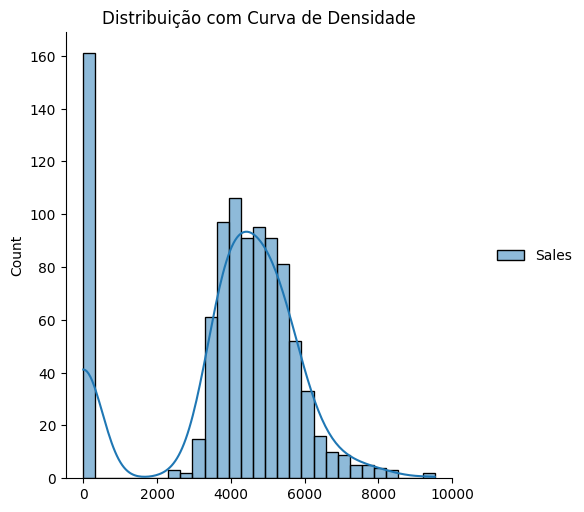

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(u_store, kde=True) # "kde=True" adiciona a curva de densidade suavizada
plt.title("Distribuição com Curva de Densidade")
plt.show()

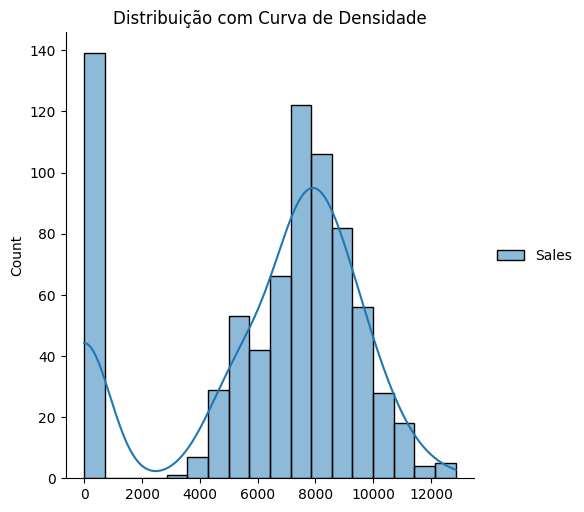

In [19]:

sns.displot(u_store20, kde=True) # "kde=True" adiciona a curva de densidade suavizada
plt.title("Distribuição com Curva de Densidade")
plt.show()

In [20]:
# Tratamento de Vendas = 0.
# Poderia interpolar (média de valores antes e depois do dia fechado), criar uma variável binária que indica sea loja estava fechada ou não,
# Poderiamos usar Sarima(Arima Sazonal). Neste caso, optaremos por excluir aqueles dias, pois não oferece informação útil para previsões.

#Regra de negócio!
u_store = u_store.loc[u_store['Sales'] != 0]

u_store20 = u_store20.loc[u_store20['Sales'] != 0]

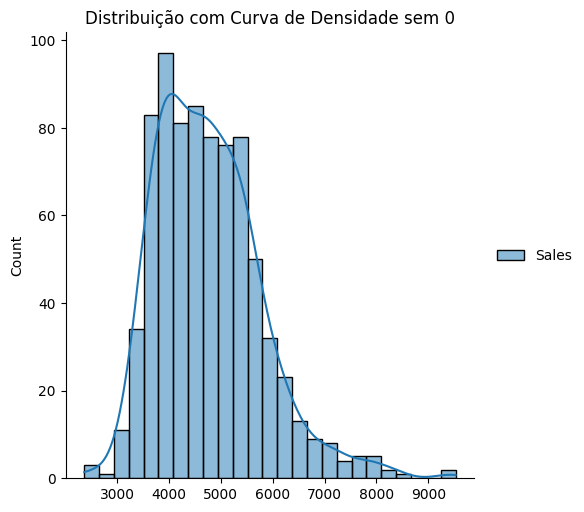

In [21]:

sns.displot(u_store, kde=True) # "kde=True" adiciona a curva de densidade suavizada
plt.title("Distribuição com Curva de Densidade sem 0")
plt.show()

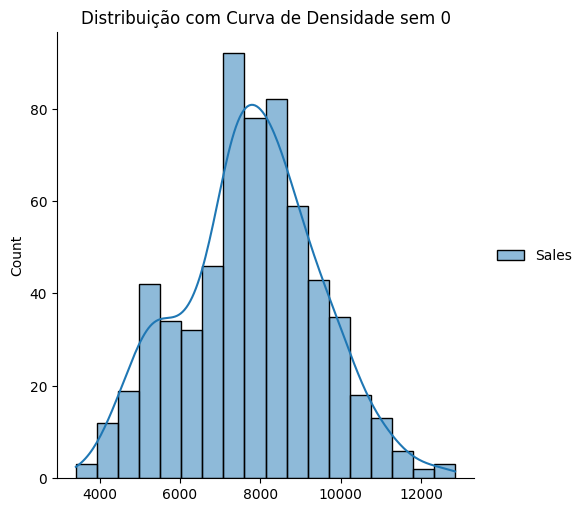

In [22]:

sns.displot(u_store20, kde=True) # "kde=True" adiciona a curva de densidade suavizada
plt.title("Distribuição com Curva de Densidade sem 0")
plt.show()

In [23]:
u_store20.head()

,Sales
Date,
2013-01-02,7110
2013-01-03,7356
2013-01-04,5599
2013-01-05,3642
2013-01-07,9662


In [24]:
u_store.describe()

,Sales
count,781.000000
mean,4759.096031
std,1012.106393
min,2362.000000
25%,4000.000000
50%,4647.000000
75%,5348.000000
max,9528.000000


Text(0.5, 1.0, 'Boxplot')

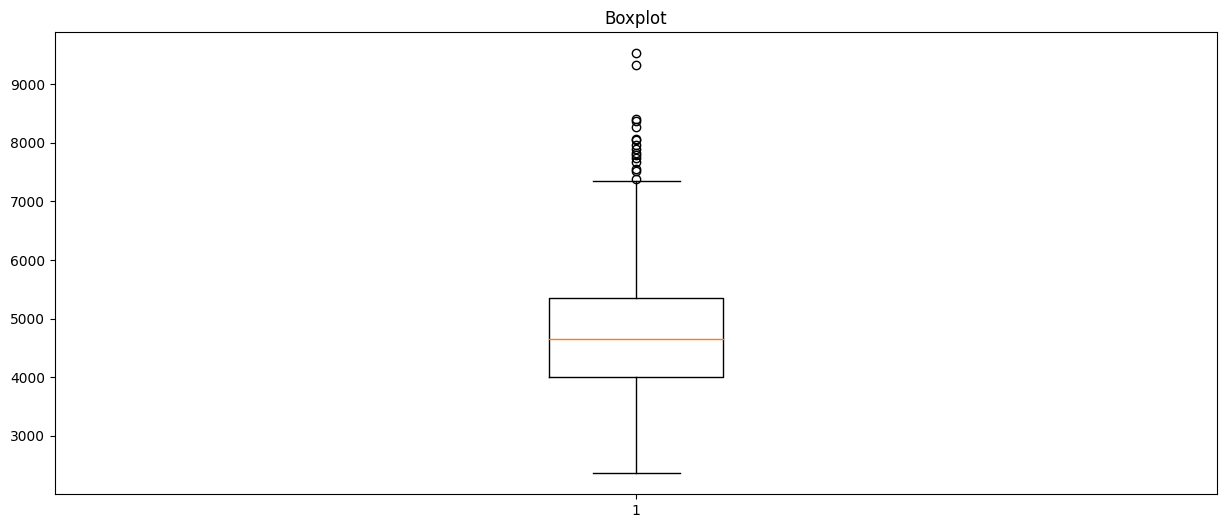

In [25]:
import matplotlib.pyplot as plt
plt.boxplot(u_store)
plt.title('Boxplot')

In [26]:
u_store.shape

(781, 1)

In [27]:
u_store.describe()

,Sales
count,781.000000
mean,4759.096031
std,1012.106393
min,2362.000000
25%,4000.000000
50%,4647.000000
75%,5348.000000
max,9528.000000


<Axes: xlabel='Date'>

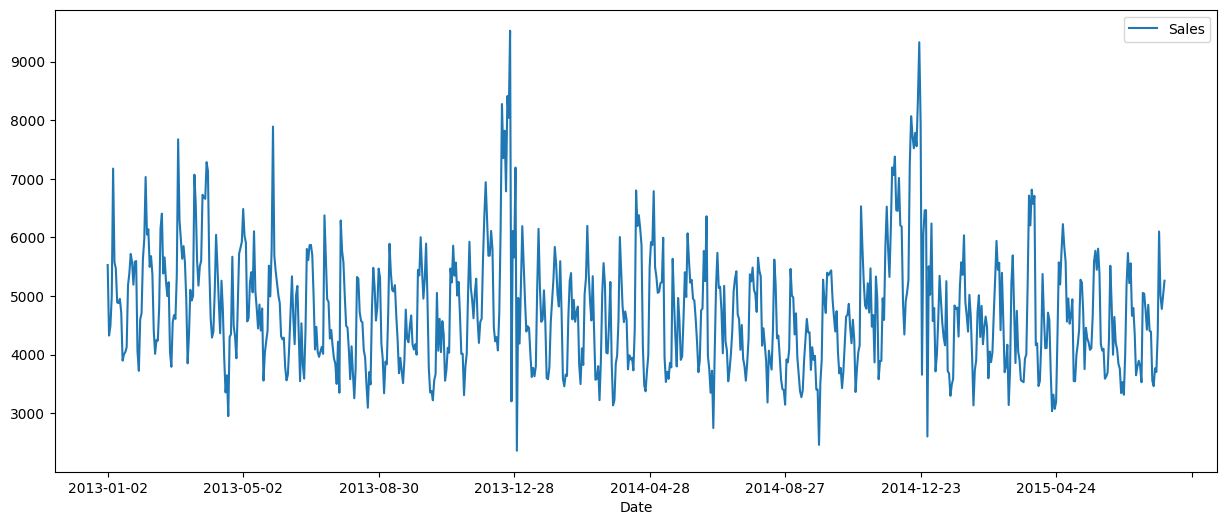

In [28]:
u_store.plot()

In [29]:
log_df_ts = np.log(u_store.Sales)

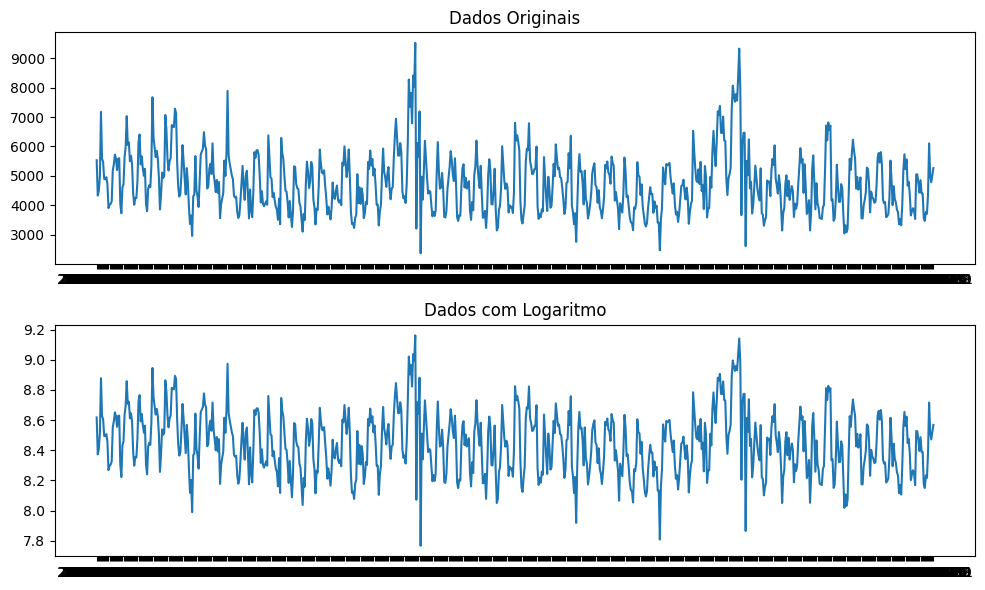

In [30]:
# Plotando os dados originais e os dados com logaritmo
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(u_store.Sales)
plt.title('Dados Originais')

plt.subplot(2, 1, 2)
plt.plot(log_df_ts)
plt.title('Dados com Logaritmo')

plt.tight_layout()
plt.show()

In [31]:
u_store.rename(columns={'Sales': 'target'}, inplace=True)

In [32]:
## from sklearn.preprocessing import RobustScaler
## rs = RobustScaler()

## u_store['target'] = rs.fit_transform(u_store[['target']].values)

In [33]:
# reducindo a 2 decimais
u_store = u_store.apply(lambda x: round(x, 2))

In [34]:
df = u_store.copy()

Nota: Claramente existe tendência. Veremos mais detalhes com a decomposição da série temporal.

### Descomposição dos Dados

Text(0.5, 1.0, 'Seasonal Decomposition of Sales Dataset')

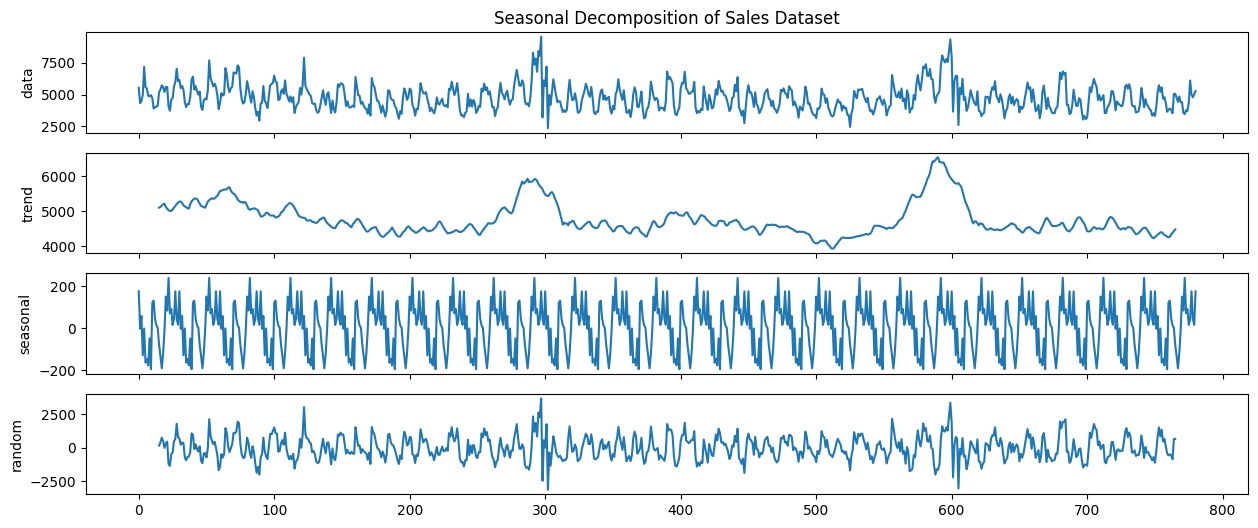

In [35]:
from pmdarima import arima
from pmdarima import datasets
from pmdarima import utils

figure_kwargs = {'figsize': (15, 6)}  #
# Decompose the Dataset into trend, seasonal and random parts.
decomposed = arima.decompose(df.values.reshape(-1),
                             'additive', m=30)

# Plot the decomposed signal of Dataset as a subplot

axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs,
                             show=False)
axes[0].set_title( "Seasonal Decomposition of Sales Dataset")

Nota: Pode-se observar que também existe sazonalidade. Agora procedemos a ver la Autocorrelação e Autocorrelação Parcial.

### Autocorrelação dos Dados

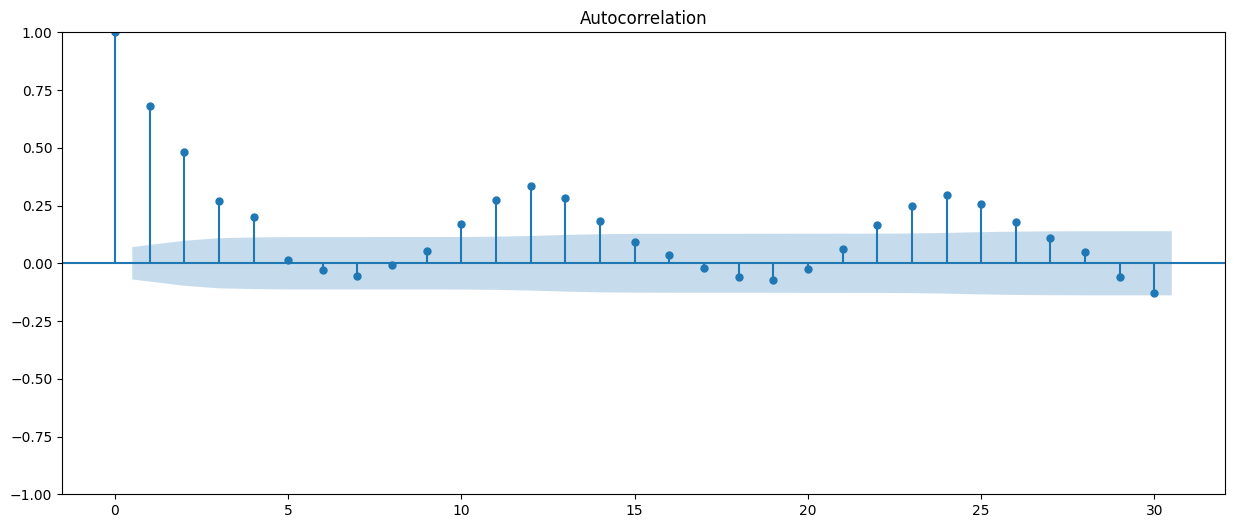

In [36]:
plot_acf(df, lags=30)
plt.show()

**Observamos que podemos trabalhar com MA= (4) **

### Autocorrelação Parcial dos Dados

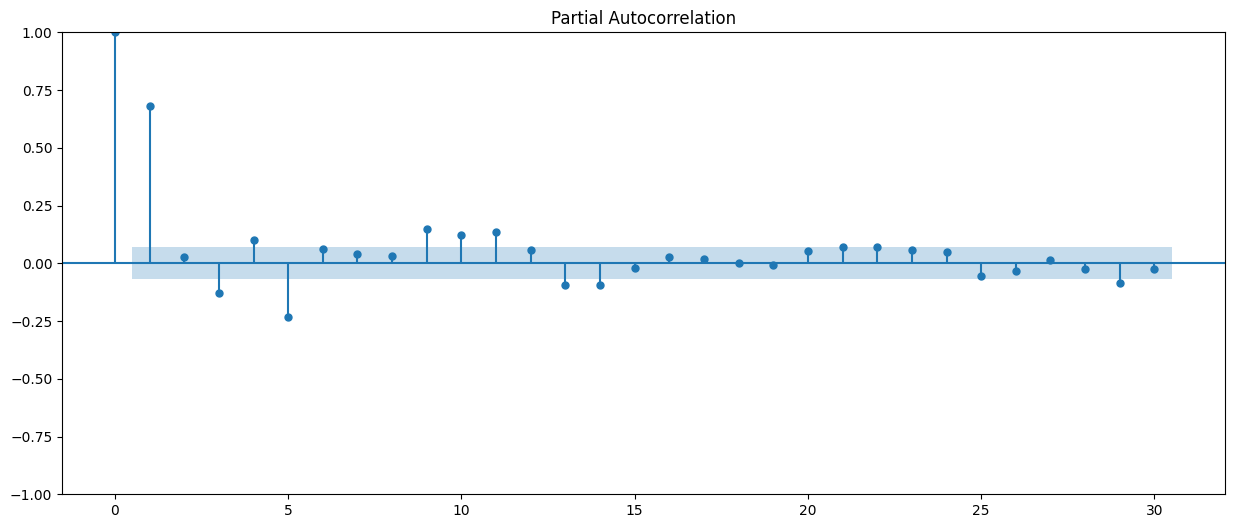

In [37]:
plot_pacf(df, lags=30)
plt.show()

**Observamos que podemos trabalhar com AR= (1)**

## Modelo Estatístico

### Teste de Estacionaridade

A estacionáriade é verificada quando a média e a variância são constantes ao longo do tempo. <br>
Usaremos o Teste Augmented Dickey-Fuller (ADF)

In [38]:
def testar_estacionariedade(df_test):
  stationary_test = adfuller(df_test)
  print('Estatística ADF:', stationary_test[0])
  print('p-valor:', stationary_test[1])
  print('Valores críticos:')
  for key, value in stationary_test[4].items():
    print('\t%s: %.3f' % (key, value))
  if stationary_test[1] <= 0.05:
    print('Os dados são estacionários.')
  else:
    print('Os dados são não-estacionários.')

In [39]:
testar_estacionariedade(df.target)

Estatística ADF: -5.399623337824004
p-valor: 3.3933795244320205e-06
Valores críticos:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Os dados são estacionários.


In [40]:
#testar_estacionariedade(df.diff().dropna().target)

**Nota: Segundo o teste ADF, os dados já são estacionários. Nesse caso, não será necessário diferenciação alguma. Só devemos testar em cada um dos nossos AR e MA até chegar a um bom resultado.**

### ACF e PACF dos Dados Diferenciados

In [42]:
# Não usaremos pq o dataset é estacionário

### Preparação de Dados Train/Test

In [43]:
m=30
test_size=30
y = df.values
train_len = len(y) - test_size

In [44]:
#Normalização
from sklearn.preprocessing import RobustScaler

_scaler = RobustScaler()
_scaler.fit(y[0:train_len].reshape(-1, 1))
serie_normalized = _scaler.transform(y.reshape(-1, 1)).flatten()

In [45]:
y_train, y_test = train_test_split(serie_normalized, train_size=train_len)
print("Tamanho dos dados de treinamento:", len(y_train))
print("Tamanho dos dados de teste:", len(y_test))

Tamanho dos dados de treinamento: 751
Tamanho dos dados de teste: 30


In [46]:
y_train

array([ 6.47598093e-01, -2.34690136e-01, -1.18078475e-01,  2.56692336e-01,
        1.85478548e+00,  6.84268427e-01,  6.04327099e-01,  1.79684635e-01,
        1.71617162e-01,  2.23689036e-01,  5.13384672e-02, -5.47854785e-01,
       -4.68646865e-01, -4.42244224e-01, -3.81371470e-01,  3.92372571e-01,
        5.47854785e-01,  7.86945361e-01,  6.82801613e-01,  4.01906857e-01,
        6.88668867e-01,  6.97469747e-01, -4.34176751e-01, -6.76200953e-01,
       -3.37367070e-02,  4.54712138e-02,  7.23138981e-01,  9.70297030e-01,
        1.74917492e+00,  1.02823616e+00,  1.09497616e+00,  6.24862486e-01,
        7.58342501e-01,  5.30253025e-01, -1.74550788e-01, -4.63513018e-01,
       -2.89695636e-01, -2.97763110e-01,  1.18811881e-01,  1.10524386e+00,
        1.29079575e+00,  5.41987532e-01,  7.42940961e-01,  4.50311698e-01,
        2.58892556e-01,  4.32709938e-01, -4.46644664e-01, -6.25595893e-01,
       -6.52731940e-02,  2.12687935e-02, -2.64026403e-02,  5.15584892e-01,
        2.22075541e+00,  

In [47]:
y_test

array([-0.46057939,  0.40337367,  0.79794646,  0.42244224,  0.66813348,
        0.01320132,  0.110011  , -0.21122112, -0.73120645, -0.62339567,
       -0.55005501, -0.6153282 , -0.81921525,  0.29849652,  0.28969564,
        0.0880088 , -0.16134947,  0.15034837, -0.17675101, -0.18481848,
       -0.79867987, -0.8676201 , -0.64393106, -0.69013568, -0.20755409,
        1.06710671,  0.26696003,  0.0990099 ,  0.27356069,  0.45177851])

### Auto Arima

Procedemos a fazer Auto Arima para ter uma referência de melhores parâmetros de AR e MA para os nossos dados.

In [48]:
model_AutoARIMA = Pipeline(
    [
        ##('boxcox', BoxCoxEndogTransformer()),
        (
            "auto - arima",
            pm.AutoARIMA(
                trace=True,
                suppress_warnings=True,
                max_p=10,
                stepwise=True,
                seasonal=False,
                m=m,
            ),
        )
    ]
)

In [49]:
model_AutoARIMA.fit(y_train)
# A partir da metodologia de  Box Jenkins

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1189.379, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1709.148, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1229.729, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1423.749, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1225.106, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1205.579, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1182.906, Time=0.34 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1195.532, Time=0.15 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=1182.678, Time=0.25 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=1193.110, Time=0.13 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=1175.946, Time=0.63 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1175.468, Time=0.13 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1175.486, Time=0.08 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=1157.671, Time=0.43 sec
 ARIMA(6,0,0)(0,0,0)[0]          

Pipeline(steps=[('auto - arima',
                 AutoARIMA(m=30, max_p=10, seasonal=False, trace=True))])

O Auto Arima confirma que os melhores parâmetros sãeriam AR=6, MA=1 e Dif=0 (já que os dados são estacionários)

In [50]:
def forecast_one_step():
    fc = model_AutoARIMA.predict(n_periods=1, return_conf_int=False)
    return fc.tolist()[0]
forecasts_auto_ARIMA = []
for new_ob in y_test:
    fc = forecast_one_step()
    forecasts_auto_ARIMA.append(fc)
    # confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    model_AutoARIMA.update(new_ob)

In [51]:
# Resultado Geral
## freq 52
## Test MSE: 0.0200491399
## Test MAE: 2.1538887011


# Resultado com Store =1
## freq 52
## Test MSE: 0.0182112981
## Test MAE: 138919173489294.5000000000

# Resultado Sem Outliers - via Z-score
#freq 26
#Test MSE: 0.4880
#Test MAPE: 3.6772

# Resultado com Outliers, sem 0
### freq 26
### Test MSE: 0.1576
### Test MAPE: 2.2116

In [52]:
print("freq", m)
print("Test MSE: %.4f" % mse(y_test, forecasts_auto_ARIMA))
print("Test MAPE: %.4f" % mape(y_test, forecasts_auto_ARIMA))

freq 30
Test MSE: 0.1615
Test MAPE: 1.9463


### Modelo ARIMA

In [53]:
modelo_ARIMA = pm.arima.ARIMA(order=(6,0,1))
modelo_ARIMA.fit(y_train)

ARIMA(order=(6, 0, 1))

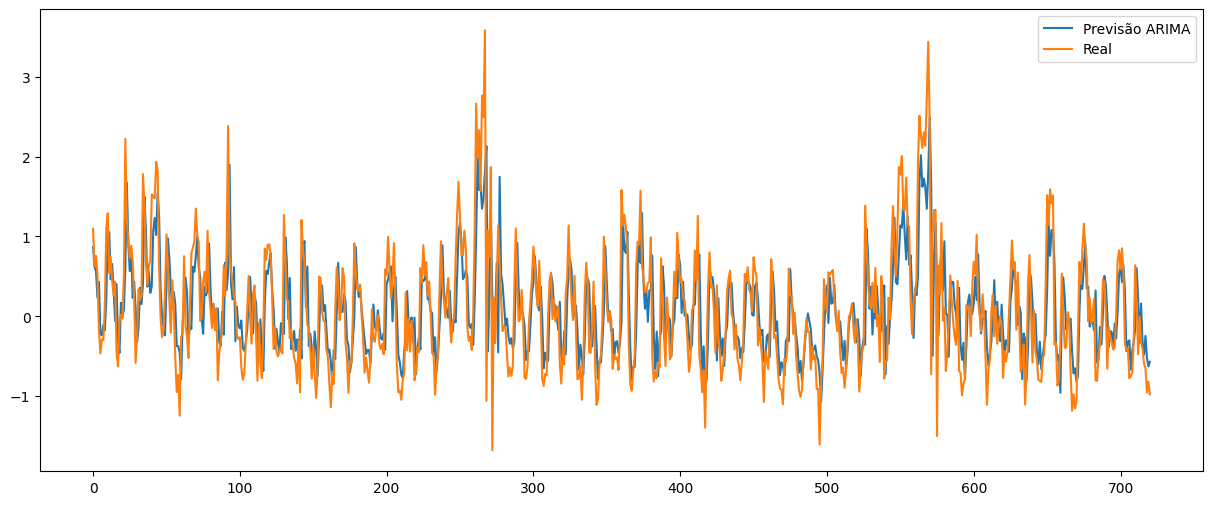

In [54]:
predictions_ARIMA = modelo_ARIMA.predict_in_sample()
plt.plot(predictions_ARIMA[30:], label='Previsão ARIMA')
plt.plot(y_train[30:], label='Real')
plt.legend()

### Modelo ARMA

In [55]:
modelo_ARMA = pm.arima.ARIMA(order=(1,0,4))
modelo_ARMA.fit(y_train)

ARIMA(order=(1, 0, 4))

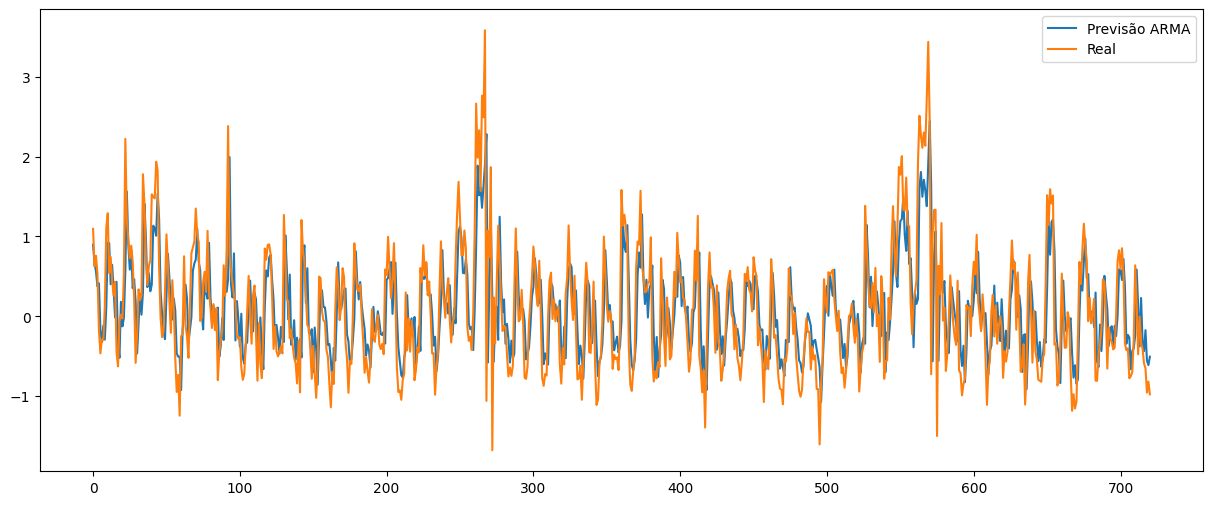

In [56]:
predictions_ARMA = modelo_ARMA.predict_in_sample()
plt.plot(predictions_ARMA[30:], label='Previsão ARMA')
plt.plot(y_train[30:], label='Real')
plt.legend()

### Avaliação do Residuo

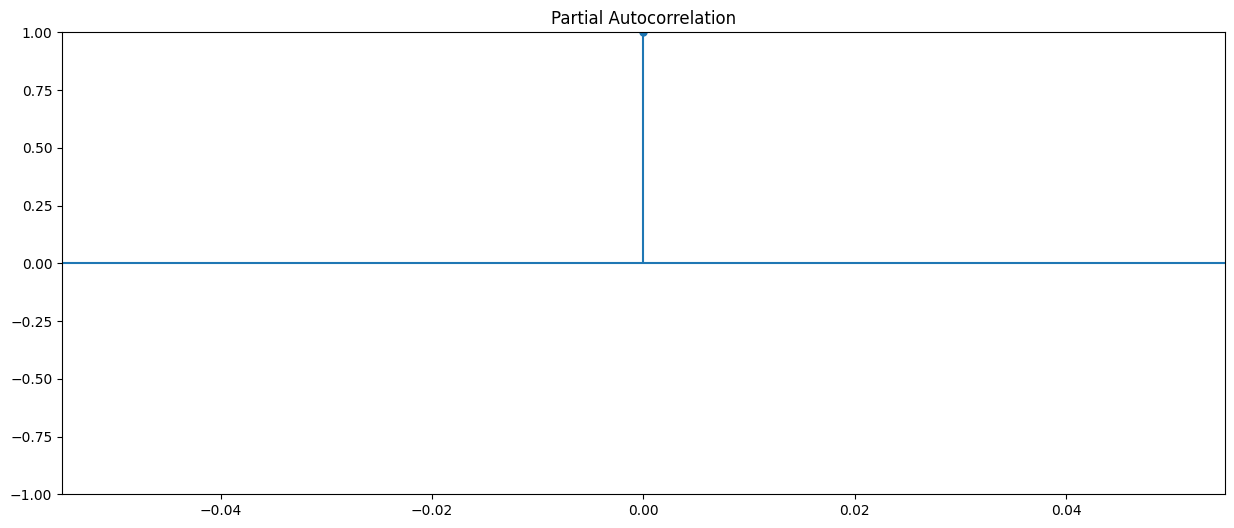

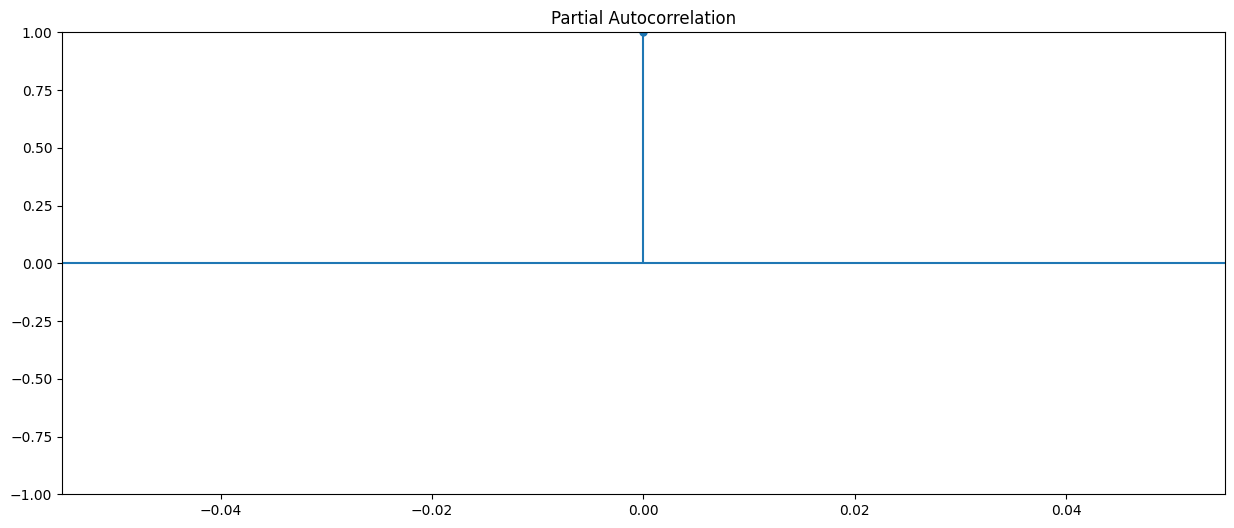

In [57]:
dados_ruido = decomposed[-1]
smt.graphics.plot_pacf(dados_ruido, lags=20, alpha=0.5)

### Teste e comparação dos modelos

In [58]:
def prever_proximo(model):
    fc = model.predict(n_periods=1, return_conf_int=False)
    return fc.tolist()[0]

In [59]:
def lista_forecasts(y_test, modelo):
  forecasts = []
  for new_ob in y_test:
    fc = prever_proximo(modelo)
    forecasts.append(fc)
    modelo.update(new_ob)
  return forecasts

def avaliar_modelo(y_test, forecasts):
  print("Teste MSE: %.10f" % mse(y_test, forecasts))
  print("Teste MAPE: %.10f" % mape(y_test, forecasts))

#### ARIMA x ARMA

In [60]:
avaliar_modelo(y_test, lista_forecasts(y_test, modelo_ARIMA))

Teste MSE: 0.1610368023
Teste MAPE: 1.9932955637


In [61]:
avaliar_modelo(y_test, lista_forecasts(y_test, modelo_ARMA))

Teste MSE: 0.1765138526
Teste MAPE: 2.2212551581


**NOTA: O Modelo Arima obteve mêtricas menores que as do Modelo Arma. Neste caso o ARIMA será o Modelo superior e que será a nossa escolha.**

## Modelo Machine Learning

### Definição de janelas

In [62]:
def gerar_janelas(tam_janela, serie):
  # serie: vetor do tipo numpy ou lista
  tam_serie = len(serie)
  tam_janela = tam_janela +1 # Adicionado mais um ponto para retornar o target na janela

  janela = list(serie[0:0+tam_janela])
  janelas_np = np.array(np.transpose(janela))

  for i in range(1, tam_serie-tam_janela):
    janela = list(serie[i:i+tam_janela])
    j_np = np.array(np.transpose(janela))

    janelas_np = np.vstack((janelas_np, j_np))
  return janelas_np

In [63]:
def select_lag_acf(serie, max_lag):
  x = serie[0: max_lag+1]

  acf_x, confint = acf(serie, nlags=max_lag, alpha=.05, fft=False)

  limiar_superior = confint[:, 1] - acf_x
  limiar_inferior = confint[:, 0] - acf_x

  lags_selecionados = []
  for i in range(1, max_lag+1):
    if acf_x[i] >= limiar_superior[i] or acf_x[i] <= limiar_inferior[i]:
      lags_selecionados.append(i-1)

  if len(lags_selecionados)==0:
    print('NENHUM LAG POR ACF')
    lags_selecionados = [i for i in range(max_lag)]

  lags_selecionados = [max_lag - (i+1) for i in lags_selecionados]
  print('LAGS', lags_selecionados)

  return lags_selecionados

In [64]:
lag_sel = select_lag_acf(df.target, 30)

LAGS [29, 28, 27, 26, 20, 19, 18, 17, 16, 8, 7, 6, 5, 4]


### Separação de Dados Train/Validação/Teste

In [65]:
def train_test_val_split(serie):
  x_date = serie[:, 0:-1]
  y_date = serie[:, -1]

  train_size = np.fix(len(serie)*0.5).astype(int)
  val_size = np.fix(len(serie)*0.25).astype(int)
  test_size = len(serie) - train_size - val_size

  x_train = x_date[0:train_size,:]
  y_train = y_date[0:train_size]
  print("Particao de Treinamento:", 0, train_size)

  x_val = x_date[train_size:(train_size+test_size),:]
  y_val = y_date[train_size:(train_size+test_size)]
  print("Particao de Validação:", train_size, (train_size+test_size))

  x_test = x_date[(train_size+test_size):-1,:]
  y_test = y_date[(train_size+test_size):-1]
  print("Particao de Teste:", (train_size+val_size), len(y_date))

  return x_train, y_train, x_test, y_test, x_val, y_val

In [66]:
max_janelas = lag_sel[0]
janelas_teste = gerar_janelas(max_janelas, df.target)
x_train, y_train, x_test, y_test, x_val, y_val = train_test_val_split(janelas_teste)

Particao de Treinamento: 0 375
Particao de Validação: 375 564
Particao de Teste: 562 751


### Modelo MLP (MultiLayer Perceptron)

In [67]:
def treinar_mlp(x_train, y_train, x_val, y_val, num_exec):
    neuronios =  [1, 10, 50, 80, 100]    #[1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 170, 200]
    func_activation =  ['tanh', 'relu']
    alg_treinamento = ['lbfgs']#, 'sgd', 'adam']
    max_iteracoes = [100, 1000]
    learning_rate = ['constant', 'invscaling']#, 'adaptive']
    qtd_lags_sel = len(x_train[0])
    best_result = np.Inf
    for i in range(0,len(neuronios)):
        for j in range(0,len(func_activation)):
            for l in range(0,len(alg_treinamento)):
                for m in range(0,len(max_iteracoes)):
                    for n in range(0,len(learning_rate)):
                        for qtd_lag in range(1, len(x_train[0]+1)): #variar a qtd de pontos utilizados na janela

                            print('QTD de Lags:', qtd_lag, 'Qtd de Neuronios' ,neuronios[i], 'Func. Act', func_activation[j])

                            for e in range(0,num_exec):
                                mlp = MLPRegressor(hidden_layer_sizes=neuronios[i], activation=func_activation[j], solver=alg_treinamento[l], max_iter = max_iteracoes[m], learning_rate= learning_rate[n])


                                mlp.fit(x_train[:,-qtd_lag:], y_train)
                                predict_validation = mlp.predict(x_val[:,-qtd_lag:])
                                mse = MSE(y_val, predict_validation)

                                if mse < best_result:
                                    best_result = mse
                                    print('Melhor MSE:', best_result)
                                    select_model = mlp
                                    qtd_lags_sel = qtd_lag

    print('QTD de Lags:', qtd_lags_sel, 'Func. Act', func_activation[j])

    return select_model, qtd_lags_sel

In [68]:
modelo_MLP, lag_sel = treinar_mlp(x_train, y_train, x_val, y_val, 2)

QTD de Lags: 1 Qtd de Neuronios 1 Func. Act tanh
Melhor MSE: 855968.4676269899
Melhor MSE: 855968.4577535148
QTD de Lags: 2 Qtd de Neuronios 1 Func. Act tanh
QTD de Lags: 3 Qtd de Neuronios 1 Func. Act tanh
QTD de Lags: 4 Qtd de Neuronios 1 Func. Act tanh
Melhor MSE: 851069.6201058617
QTD de Lags: 5 Qtd de Neuronios 1 Func. Act tanh
QTD de Lags: 6 Qtd de Neuronios 1 Func. Act tanh
QTD de Lags: 7 Qtd de Neuronios 1 Func. Act tanh
QTD de Lags: 8 Qtd de Neuronios 1 Func. Act tanh
QTD de Lags: 9 Qtd de Neuronios 1 Func. Act tanh
QTD de Lags: 10 Qtd de Neuronios 1 Func. Act tanh
Melhor MSE: 843707.9312655308
QTD de Lags: 11 Qtd de Neuronios 1 Func. Act tanh
QTD de Lags: 12 Qtd de Neuronios 1 Func. Act tanh
QTD de Lags: 13 Qtd de Neuronios 1 Func. Act tanh
Melhor MSE: 754233.5043920184
QTD de Lags: 14 Qtd de Neuronios 1 Func. Act tanh
QTD de Lags: 15 Qtd de Neuronios 1 Func. Act tanh
QTD de Lags: 16 Qtd de Neuronios 1 Func. Act tanh
QTD de Lags: 17 Qtd de Neuronios 1 Func. Act tanh
QTD de La

QTD de Lags: 25 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 26 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 27 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 28 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 1 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 2 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 3 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 4 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 5 Qtd de Neuronios 1 Func. Act relu
Melhor MSE: 392755.2252957806
QTD de Lags: 6 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 7 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 8 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 9 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 10 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 11 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 12 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 13 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 14 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 15 Qtd de Neuronios 1 Func. Act relu
QTD de Lags: 16 Qtd de Neuron

QTD de Lags: 20 Qtd de Neuronios 10 Func. Act tanh
QTD de Lags: 21 Qtd de Neuronios 10 Func. Act tanh
QTD de Lags: 22 Qtd de Neuronios 10 Func. Act tanh
QTD de Lags: 23 Qtd de Neuronios 10 Func. Act tanh
QTD de Lags: 24 Qtd de Neuronios 10 Func. Act tanh
QTD de Lags: 25 Qtd de Neuronios 10 Func. Act tanh
QTD de Lags: 26 Qtd de Neuronios 10 Func. Act tanh
QTD de Lags: 27 Qtd de Neuronios 10 Func. Act tanh
QTD de Lags: 28 Qtd de Neuronios 10 Func. Act tanh
QTD de Lags: 1 Qtd de Neuronios 10 Func. Act relu
QTD de Lags: 2 Qtd de Neuronios 10 Func. Act relu
QTD de Lags: 3 Qtd de Neuronios 10 Func. Act relu
QTD de Lags: 4 Qtd de Neuronios 10 Func. Act relu
QTD de Lags: 5 Qtd de Neuronios 10 Func. Act relu
QTD de Lags: 6 Qtd de Neuronios 10 Func. Act relu
QTD de Lags: 7 Qtd de Neuronios 10 Func. Act relu
QTD de Lags: 8 Qtd de Neuronios 10 Func. Act relu
QTD de Lags: 9 Qtd de Neuronios 10 Func. Act relu
QTD de Lags: 10 Qtd de Neuronios 10 Func. Act relu
QTD de Lags: 11 Qtd de Neuronios 10 Func

QTD de Lags: 13 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 14 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 15 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 16 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 17 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 18 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 19 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 20 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 21 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 22 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 23 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 24 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 25 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 26 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 27 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 28 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 1 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 2 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 3 Qtd de Neuronios 50 Func. Act tanh
QTD de Lags: 4 Qtd de Neuronios 50

QTD de Lags: 7 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 8 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 9 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 10 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 11 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 12 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 13 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 14 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 15 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 16 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 17 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 18 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 19 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 20 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 21 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 22 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 23 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 24 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 25 Qtd de Neuronios 50 Func. Act relu
QTD de Lags: 26 Qtd de Neuronios 5

QTD de Lags: 2 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 3 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 4 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 5 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 6 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 7 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 8 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 9 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 10 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 11 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 12 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 13 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 14 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 15 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 16 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 17 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 18 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 19 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 20 Qtd de Neuronios 80 Func. Act relu
QTD de Lags: 21 Qtd de Neuronios 80 Fun

QTD de Lags: 24 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 25 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 26 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 27 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 28 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 1 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 2 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 3 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 4 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 5 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 6 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 7 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 8 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 9 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 10 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 11 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 12 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 13 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 14 Qtd de Neuronios 100 Func. Act tanh
QTD de Lags: 15 Qtd d

In [69]:
print('Melhor configuração do MLP:', modelo_MLP)
print('Melhor lag:', lag_sel)

Melhor configuração do MLP: MLPRegressor(hidden_layer_sizes=50, max_iter=100, solver='lbfgs')
Melhor lag: 7


### Teste

In [70]:
previsoes_mlp_treino = modelo_MLP.predict(x_train[:, -lag_sel:])
previsoes_mlp_teste = modelo_MLP.predict(x_test[:, -lag_sel:])
previsoes_mlp_val = modelo_MLP.predict(x_val[:, -lag_sel:])

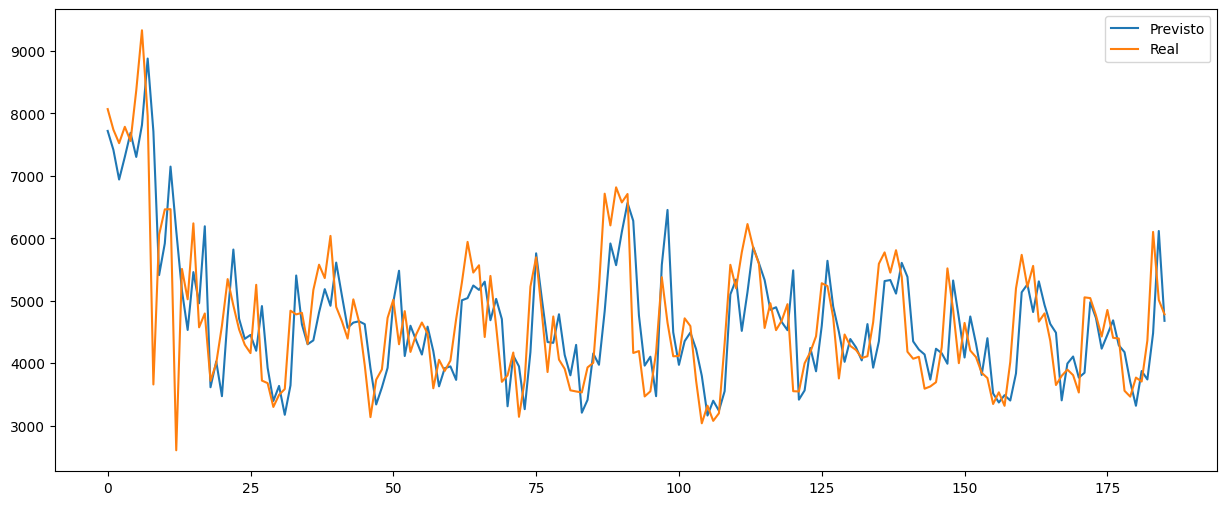

In [71]:
plt.plot(previsoes_mlp_teste, label = 'Previsto')
plt.plot(y_test, label='Real')
plt.legend(loc='best')
plt.show()

In [ ]:
print('MSE:', mse(y_test, previsoes_mlp_teste))
print('MAPE:', mape(y_test, previsoes_mlp_teste))

MSE: 571797.5017856143
MAPE: 0.11916671819597781


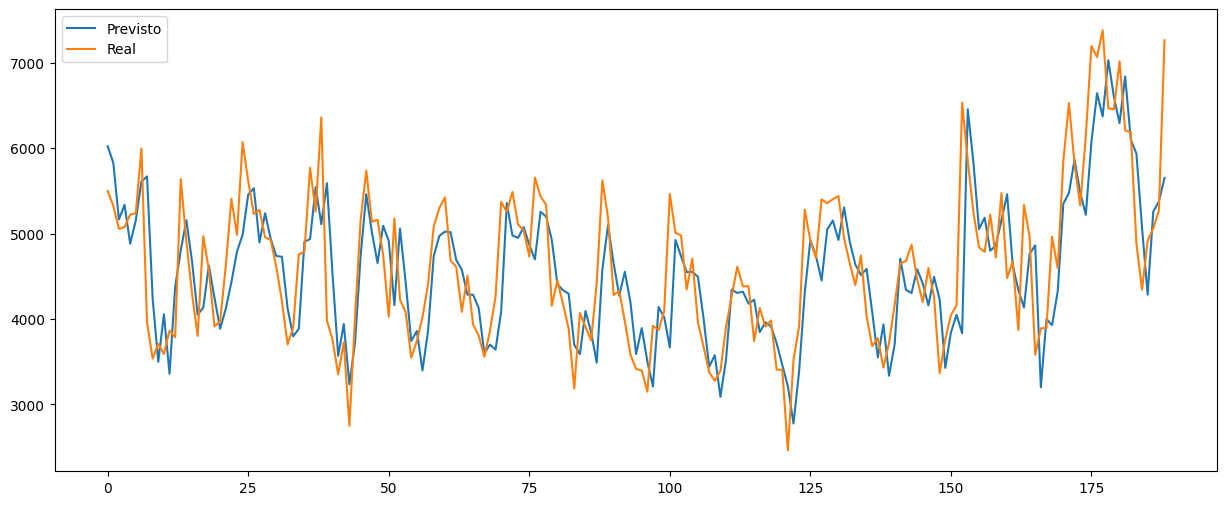

In [73]:
plt.plot(previsoes_mlp_val, label = 'Previsto')
plt.plot(y_val, label='Real')
plt.legend(loc='best')
plt.show()

In [ ]:
print('MSE:', mse(y_val, previsoes_mlp_val))
print('MAPE:', mape(y_val, previsoes_mlp_val))

MSE: 353082.85923160054
MAPE: 0.0954451539839488
